<a href="https://colab.research.google.com/github/SaurabhIndi/UM-Projects/blob/main/mobile_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load the dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/mobiledataset/dataset.csv')

# 3. Perform EDA:

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

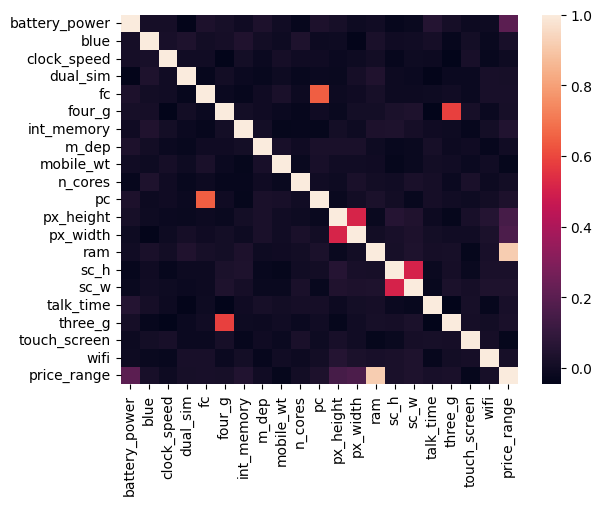

In [ ]:
# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Visualize correlations
sns.heatmap(data.corr())
plt.show()

# 4. Feature engineering and preprocessing:

In [ ]:
# Create a new feature for screen diagonal
data['screen_diagonal'] = np.sqrt(data['sc_h']**2 + data['sc_w']**2)

# Scale numerical features
scaler = StandardScaler()
data[['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w', 'screen_diagonal']] = scaler.fit_transform(data[['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w', 'screen_diagonal']])

# Split into features and target
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model training and evaluation:

In [ ]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.87      0.87        91
           2       0.79      0.83      0.81        92
           3       0.92      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400

[[101   4   0   0]
 [  6  79   6   0]
 [  0   8  76   8]
 [  0   0  14  98]]


In [ ]:
# We can experiment with different algorithms, hyperparameter tuning,
# and feature engineering techniques to improve the model's performance.